In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
names_by_year = {}
for year in range (1900,2000):
    names_by_year[year] = pd.read_csv(
    f'names/yob{year}.txt', names = ('Name', 'Gender', 'Count')
    )
names_all = pd.concat(names_by_year).reset_index(level=1,drop=True)

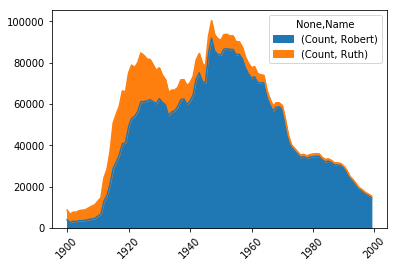

In [163]:
name_dynamics = names_all.groupby([names_all.index, 'Name']).sum()
name_dynamics = name_dynamics.loc[(name_dynamics.index.get_level_values(1).isin(['Ruth','Robert']))]
name_dynamics.unstack(['Name']).plot(kind='area',rot=45)

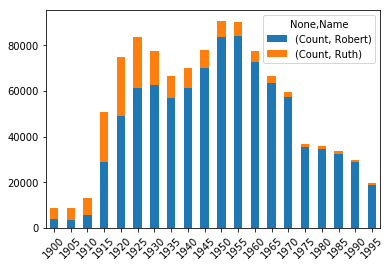

In [164]:
name_dynamics = names_all.groupby([names_all.index, 'Name']).sum()
name_dynamics = name_dynamics.loc[(name_dynamics.index.get_level_values(1).isin(['Ruth','Robert']))]
name_dynamics = name_dynamics.loc[(name_dynamics.index.get_level_values(0).isin(range(1900,2000)[::5]))]
name_dynamics.unstack(['Name']).plot(kind='bar', rot=45,stacked=True)

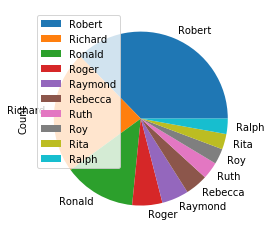

In [126]:
names_top10 = names_all.groupby([names_all.index, 'Name']).sum()
names_top10 = names_top10.loc[(names_top10.index.get_level_values(0).isin(['1950']))]
names_top10 = names_top10.sort_values('Count', ascending=False)
names_top10 = names_top10.reset_index('Name')
names_top10 = names_top10[names_top10['Name'].str.startswith('R')].head(10)
names_top10 = names_top10.reset_index(0, drop=True)
names_top10 = names_top10.set_index(['Name'])
names_top10.plot(kind='pie', y='Count')

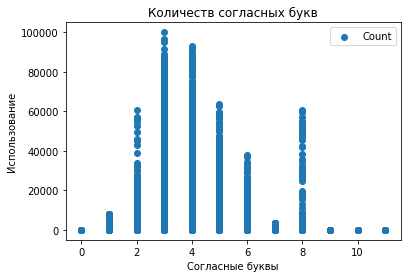

In [156]:
consonants = list("BCDFGHJKLMNPQRSTVWXYZbcdfghjklmnpqrstvwxyz")
my_chars = names_all.groupby([names_all.index, 'Name']).sum()
my_chars = my_chars.loc[(my_chars.index.get_level_values(0).isin(range(1900,2000)))]
my_chars = my_chars.reset_index(['Name'])
def get_consonants(word):
    number_of_consonants = sum(word.count(c) for c in consonants)
    return number_of_consonants
my_chars['len'] = my_chars['Name'].map(get_consonants)
x = my_chars['len']
y = my_chars['Count']
plt.scatter(x,y)
plt.xlabel('Согласные буквы')
plt.ylabel('Использование')
plt.title('Количество согласных букв')
plt.legend()
plt.show()

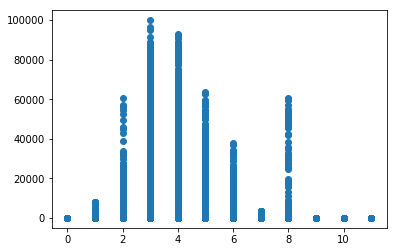